In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import sys

sys.path.append("..")

<IPython.core.display.Javascript object>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Union
from util.spike_trains import get_GWN
from scipy.stats import poisson
from util.plotting import plot_volt_trace

<IPython.core.display.Javascript object>

In [4]:
plt.rcParams["figure.figsize"] = (16, 8)

<IPython.core.display.Javascript object>

In [5]:
class LIF:
    def __init__(self, dt: float):

        self.dt = dt

        self.E_l = -65.0  # resting potential
        self.v_th = -55.0  # threshold
        self.v_reset = -65.0  # v_reset
        self.tau_m = 10.0  # membrane time constant -> given by TODO
        self.R = 20  # resistance

        self.spikes = []
        self.voltages = [self.E_l]

    def step(self, input_current: Union[float, int]):
        if self.voltages[-1] >= self.v_th:
            self.spikes = self.spikes + [len(self.voltages)]
            v = self.v_reset
        else:
            dv = (self.dt / self.tau_m) * (self.E_l - self.voltages[-1]) + (
                input_current / self.R
            )

            v = self.voltages[-1] + dv

        self.voltages += [v]

<IPython.core.display.Javascript object>

In [6]:
mu = 0.1
dt = 0.1
size = 5000
np.random.seed(seed=1)
ips = poisson.rvs(0.2, size=size - 1)
ips[ips > 0] = 1
ips *= 10

<IPython.core.display.Javascript object>

In [7]:
ips = np.zeros(size - 1)
ips[500:1000] = 3

<IPython.core.display.Javascript object>

no of spikes: 4


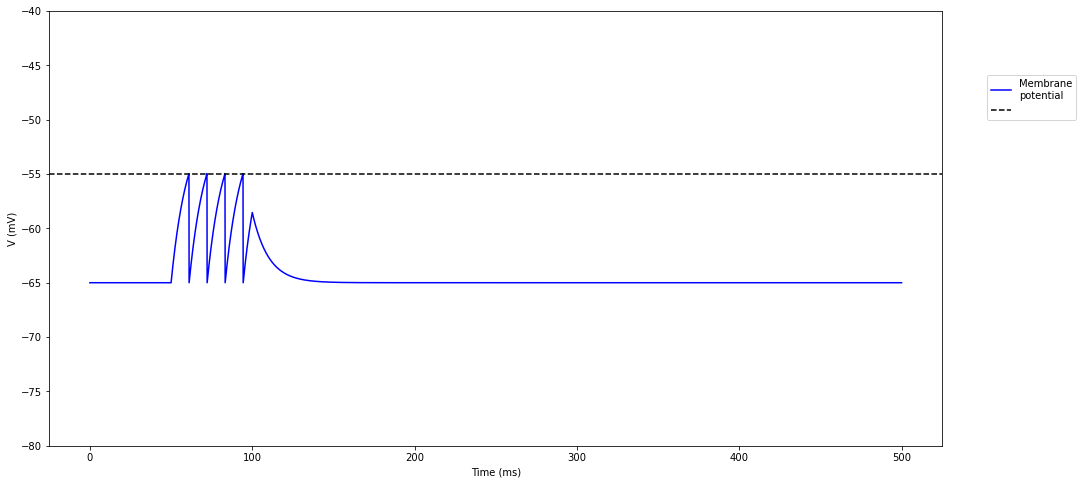

<IPython.core.display.Javascript object>

In [8]:
lif = LIF(dt=dt)

for inp in ips:
    lif.step(inp)

plot_volt_trace(lif.voltages, lif.v_th, dt=dt, sim_length=size)
print(f"no of spikes: {len(lif.spikes)}")